## 1er Parcial - Simulación Computacional 2020-I

In [81]:
#Librerias y funciones
import numpy as np
import scipy as sp
from sympy import *
import math
import time
from random import random

def genran(a,b,m,xant):
    xsig = (a*xant + b) % m
    usig = xsig / m
    return [xsig,usig]

def genranN(a,b,m,x0,N):
    xant = x0
    I=[]
    X=[]
    U=[]
    for t in range(1, N+1):
        [xi,ui] = genran(a,b,m,xant)
        I.append(t)
        X.append(xi)
        U.append(ui)
        xant = xi
    return [I,X,U]
def showValues(I,X,U):
    print("i\tXi\tUi")
    for t in range(0, len(X)):
        print("%d\t%d\t%2.4f" % (I[t],X[t],U[t]), sep=' ', end='\n')
def genpoisson(U,L):
    i=0
    px=np.exp(-L)
    Fx=px

    while True:
      if U < Fx:
        Xi = i
        return Xi
        break
      px = (L*px)/(i+1)
      Fx = Fx + px
      i = i + 1

def genpoissonN(Ui,L):
  X=[]
  for i in range(0,len(Ui)):
      xi = genpoisson(Ui[i],L)
      X.append(xi)
  return X
def genvardiscret(U,X,P):
    V = []
    for t in range(0, len(U)):
        for t2 in range(0, len(X)):
            if U[t]<P[t2]:
                V.append(X[t2])
                break
    return V
def genbinomial(U,n,p):
  c=p/(1-p)
  i=0
  px=np.power(1-p,n)
  Fx=px

  while True:
    if U < Fx:
      Xi = i
      return Xi
      break
    px=(c*(n-i)/(i+1))*px 
    Fx = Fx + px
    i = i + 1

def genbinomialN(Ui,n,p,N):
  X=[]
  for i in range(0,len(Ui)):
      xi = genbinomial(Ui[i],n,p)
      X.append(xi)
  return X
def tam_ciclo(x):
    for i in range(len(x) - 3):
        if x[i] in x[i+1:len(x)]:
            index = i + 1 + x[i+1:len(x)].index(x[i])
            long = index - i
            if x[i] == x[i + long] and x[i + 1] == x[i + 1 + long] and x[i + 2] == x[i + 2 + long]:
                
                print("El tamaño es: ", long)
                break

## 1.  (1.0 punto)
Para los siguientes generadores congruenciales mixtos encuentre $u_1,...,u_{100}$ y el tamaño del ciclo (si lo tiene)

**a)** $x_0=93, x_n = (14x_{n-1}+9) \mod 127$


In [82]:
N=100
a=14
b=9
m=127
x0=93
[I,X,U] = genranN(a,b,m,x0,N)
showValues(I,X,U)

print("El tamaño del ciclo es: "+str(tam_ciclo(X)))

i	Xi	Ui
1	41	0.3228
2	75	0.5906
3	43	0.3386
4	103	0.8110
5	54	0.4252
6	3	0.0236
7	51	0.4016
8	88	0.6929
9	98	0.7717
10	111	0.8740
11	39	0.3071
12	47	0.3701
13	32	0.2520
14	76	0.5984
15	57	0.4488
16	45	0.3543
17	4	0.0315
18	65	0.5118
19	30	0.2362
20	48	0.3780
21	46	0.3622
22	18	0.1417
23	7	0.0551
24	107	0.8425
25	110	0.8661
26	25	0.1969
27	105	0.8268
28	82	0.6457
29	14	0.1102
30	78	0.6142
31	85	0.6693
32	56	0.4409
33	31	0.2441
34	62	0.4882
35	115	0.9055
36	95	0.7480
37	69	0.5433
38	86	0.6772
39	70	0.5512
40	100	0.7874
41	12	0.0945
42	50	0.3937
43	74	0.5827
44	29	0.2283
45	34	0.2677
46	104	0.8189
47	68	0.5354
48	72	0.5669
49	1	0.0079
50	23	0.1811
51	77	0.6063
52	71	0.5591
53	114	0.8976
54	81	0.6378
55	0	0.0000
56	9	0.0709
57	8	0.0630
58	121	0.9528
59	52	0.4094
60	102	0.8031
61	40	0.3150
62	61	0.4803
63	101	0.7953
64	26	0.2047
65	119	0.9370
66	24	0.1890
67	91	0.7165
68	13	0.1024
69	64	0.5039
70	16	0.1260
71	106	0.8346
72	96	0.7559
73	83	0.6535
74	28	0.2205
75	20	0.1575
76	35	0.2756
77	118

**b)** $x_0=123, x_n = (191x_{n-1}) \mod 3173$

In [83]:
N=100
a=191
b=0
m=3173
x0=123
[I,X,U] = genranN(a,b,m,x0,N)
showValues(I,X,U)

tam_ciclo(X)

i	Xi	Ui
1	1282	0.4040
2	541	0.1705
3	1795	0.5657
4	161	0.0507
5	2194	0.6915
6	218	0.0687
7	389	0.1226
8	1320	0.4160
9	1453	0.4579
10	1472	0.4639
11	1928	0.6076
12	180	0.0567
13	2650	0.8352
14	1643	0.5178
15	2859	0.9010
16	313	0.0986
17	2669	0.8412
18	2099	0.6615
19	1111	0.3501
20	2783	0.8771
21	1662	0.5238
22	142	0.0448
23	1738	0.5477
24	1966	0.6196
25	1092	0.3442
26	2327	0.7334
27	237	0.0747
28	845	0.2663
29	2745	0.8651
30	750	0.2364
31	465	0.1465
32	3144	0.9909
33	807	0.2543
34	1833	0.5777
35	1073	0.3382
36	1871	0.5897
37	1985	0.6256
38	1548	0.4879
39	579	0.1825
40	2707	0.8531
41	3011	0.9489
42	788	0.2483
43	1377	0.4340
44	2821	0.8891
45	2574	0.8112
46	2992	0.9430
47	332	0.1046
48	3125	0.9849
49	351	0.1106
50	408	0.1286
51	1776	0.5597
52	2878	0.9070
53	769	0.2424
54	921	0.2903
55	1396	0.4400
56	104	0.0328
57	826	0.2603
58	2289	0.7214
59	2498	0.7873
60	1168	0.3681
61	978	0.3082
62	2764	0.8711
63	1206	0.3801
64	1890	0.5957
65	2441	0.7693
66	2973	0.9370
67	3049	0.9609
68	1700	0.5358
69	

**c)** $x_0=7, x_n = (5x_{n-1}+3) \mod 33$

In [84]:
N=100
a=5
b=3
m=33
x0=7
[I,X,U] = genranN(a,b,m,x0,N)
showValues(I,X,U)

tam_ciclo(X)

i	Xi	Ui
1	5	0.1515
2	28	0.8485
3	11	0.3333
4	25	0.7576
5	29	0.8788
6	16	0.4848
7	17	0.5152
8	22	0.6667
9	14	0.4242
10	7	0.2121
11	5	0.1515
12	28	0.8485
13	11	0.3333
14	25	0.7576
15	29	0.8788
16	16	0.4848
17	17	0.5152
18	22	0.6667
19	14	0.4242
20	7	0.2121
21	5	0.1515
22	28	0.8485
23	11	0.3333
24	25	0.7576
25	29	0.8788
26	16	0.4848
27	17	0.5152
28	22	0.6667
29	14	0.4242
30	7	0.2121
31	5	0.1515
32	28	0.8485
33	11	0.3333
34	25	0.7576
35	29	0.8788
36	16	0.4848
37	17	0.5152
38	22	0.6667
39	14	0.4242
40	7	0.2121
41	5	0.1515
42	28	0.8485
43	11	0.3333
44	25	0.7576
45	29	0.8788
46	16	0.4848
47	17	0.5152
48	22	0.6667
49	14	0.4242
50	7	0.2121
51	5	0.1515
52	28	0.8485
53	11	0.3333
54	25	0.7576
55	29	0.8788
56	16	0.4848
57	17	0.5152
58	22	0.6667
59	14	0.4242
60	7	0.2121
61	5	0.1515
62	28	0.8485
63	11	0.3333
64	25	0.7576
65	29	0.8788
66	16	0.4848
67	17	0.5152
68	22	0.6667
69	14	0.4242
70	7	0.2121
71	5	0.1515
72	28	0.8485
73	11	0.3333
74	25	0.7576
75	29	0.8788
76	16	0.4848
77	17	0.5152
78	22	0.6667
79

## 2.  (1.0 punto)
Calcule el estadístico $\chi^2$ para los siguientes generadores congruenciales mixtos a partir de la generación de $1000$ los valores pseudoaleatorios uniformes de $U(0,1)$: $u_1,...,u_{1000}$, para un $k=101$.

**a)** $x_0=1791, x_n = (65539x_{n-1}) \mod {2^{31}}$



In [85]:
N=1000
a=65539
b=0
m=2**31
x0=1791
[I,X,U] = genranN(a,b,m,x0,N)
showValues(I,X,U)

i	Xi	Ui
1	117380349	0.0547
2	704265975	0.3279
3	1021689061	0.4758
4	1939224239	0.9030
5	292660237	0.1363
6	1482812455	0.6905
7	1967965301	0.9164
8	609963359	0.2840
9	980477981	0.4566
10	393197655	0.1831
11	2124818693	0.9894
12	620198671	0.2888
13	1777692973	0.8278
14	789402503	0.3676
15	1622080149	0.7553
16	480374719	0.2237
17	1168428861	0.5441
18	539717047	0.2513
19	1312377125	0.6111
20	869325679	0.4048
21	1994494541	0.9288
22	1995552487	0.9293
23	465314997	0.2167
24	2011786783	0.9368
25	1440434781	0.6708
26	1273945879	0.5932
27	1122213189	0.5226
28	1710217167	0.7964
29	161384301	0.0752
30	608736839	0.2835
31	52478677	0.0244
32	1278691455	0.5954
33	757389693	0.3527
34	1626049655	0.7572
35	792307045	0.3689
36	856813615	0.3990
37	157601933	0.0734
38	1824223655	0.8495
39	936989941	0.4363
40	2088828639	0.9727
41	1952578717	0.9092
42	1505949143	0.7013
43	52420997	0.0244
44	1793369231	0.8351
45	1698491821	0.7909
46	493078791	0.2296
47	556948245	0.2593
48	1051463999	0.4896
49	1296249789	0.60

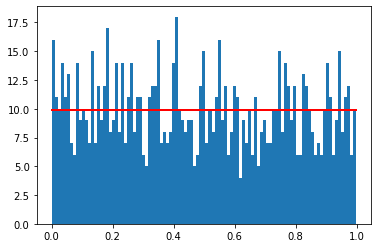

Estadístico chi2 = 97.66799999999996
97.668


In [86]:
#chi cuadrado
import matplotlib.pyplot as plt
from scipy import stats

k=101
count, bins, ignored = plt.hist(U, k)
plt.plot(bins, np.ones_like(bins)*(N/k), linewidth=2, color='r')
plt.show()

chiest=0
for i in range(0,k):
    chiest = chiest + ((count[i]-(N/k))**2)/(N/k)
print("Estadístico chi2 = "+str(chiest))

chisq, pvalue = stats.chisquare(count, f_exp=np.ones_like(count)*(N/k))
print(chisq)

**b)** $x_0=6773, x_n = (75x_{n-1}) \mod {2^{16} + 1}$

In [87]:
N=1000
a=75
b=0
m=(2**16)+1
x0=6773
[I,X,U] = genranN(a,b,m,x0,N)
showValues(I,X,U)

i	Xi	Ui
1	49216	0.7510
2	21128	0.3224
3	11712	0.1787
4	26419	0.4031
5	15315	0.2337
6	34496	0.5264
7	31257	0.4769
8	50480	0.7703
9	50391	0.7689
10	43716	0.6670
11	1850	0.0282
12	7676	0.1171
13	51404	0.7844
14	54154	0.8263
15	63793	0.9734
16	274	0.0042
17	20550	0.3136
18	33899	0.5172
19	52019	0.7937
20	34742	0.5301
21	49707	0.7585
22	57953	0.8843
23	21033	0.3209
24	4587	0.0700
25	16340	0.2493
26	45834	0.6994
27	29626	0.4520
28	59229	0.9037
29	51196	0.7812
30	38554	0.5883
31	7922	0.1209
32	4317	0.0659
33	61627	0.9403
34	34435	0.5254
35	26682	0.4071
36	35040	0.5347
37	6520	0.0995
38	30241	0.4614
39	39817	0.6075
40	37110	0.5662
41	30696	0.4684
42	8405	0.1282
43	40542	0.6186
44	25948	0.3959
45	45527	0.6947
46	6601	0.1007
47	36316	0.5541
48	36683	0.5597
49	64208	0.9797
50	31399	0.4791
51	61130	0.9328
52	62697	0.9567
53	49148	0.7499
54	16028	0.2446
55	22434	0.3423
56	44125	0.6733
57	32525	0.4963
58	14506	0.2213
59	39358	0.6005
60	2685	0.0410
61	4764	0.0727
62	29615	0.4519
63	58404	0.8912
64	54

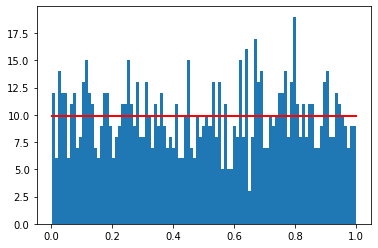

Estadístico chi2 = 87.56800000000001
87.568


In [88]:
#chi cuadrado
import matplotlib.pyplot as plt
from scipy import stats

k=101
count, bins, ignored = plt.hist(U, k)
plt.plot(bins, np.ones_like(bins)*(N/k), linewidth=2, color='r')
plt.show()

chiest=0
for i in range(0,k):
    chiest = chiest + ((count[i]-(N/k))**2)/(N/k)
print("Estadístico chi2 = "+str(chiest))

chisq, pvalue = stats.chisquare(count, f_exp=np.ones_like(count)*(N/k))
print(chisq)

**c)** $x_0=179, x_n = (5x_{n-1}+7) \mod 200$

In [89]:
N=1000
a=5
b=7
m=200
x0=179
[I,X,U] = genranN(a,b,m,x0,N)
showValues(I,X,U)

i	Xi	Ui
1	102	0.5100
2	117	0.5850
3	192	0.9600
4	167	0.8350
5	42	0.2100
6	17	0.0850
7	92	0.4600
8	67	0.3350
9	142	0.7100
10	117	0.5850
11	192	0.9600
12	167	0.8350
13	42	0.2100
14	17	0.0850
15	92	0.4600
16	67	0.3350
17	142	0.7100
18	117	0.5850
19	192	0.9600
20	167	0.8350
21	42	0.2100
22	17	0.0850
23	92	0.4600
24	67	0.3350
25	142	0.7100
26	117	0.5850
27	192	0.9600
28	167	0.8350
29	42	0.2100
30	17	0.0850
31	92	0.4600
32	67	0.3350
33	142	0.7100
34	117	0.5850
35	192	0.9600
36	167	0.8350
37	42	0.2100
38	17	0.0850
39	92	0.4600
40	67	0.3350
41	142	0.7100
42	117	0.5850
43	192	0.9600
44	167	0.8350
45	42	0.2100
46	17	0.0850
47	92	0.4600
48	67	0.3350
49	142	0.7100
50	117	0.5850
51	192	0.9600
52	167	0.8350
53	42	0.2100
54	17	0.0850
55	92	0.4600
56	67	0.3350
57	142	0.7100
58	117	0.5850
59	192	0.9600
60	167	0.8350
61	42	0.2100
62	17	0.0850
63	92	0.4600
64	67	0.3350
65	142	0.7100
66	117	0.5850
67	192	0.9600
68	167	0.8350
69	42	0.2100
70	17	0.0850
71	92	0.4600
72	67	0.3350
73	142	0.7100
74	117	0.5850
7

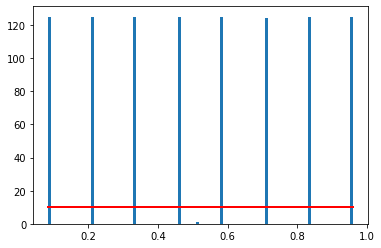

Estadístico chi2 = 11599.951999999974
11599.952000000001


In [90]:
#chi cuadrado
import matplotlib.pyplot as plt
from scipy import stats

k=101
count, bins, ignored = plt.hist(U, k)
plt.plot(bins, np.ones_like(bins)*(N/k), linewidth=2, color='r')
plt.show()

chiest=0
for i in range(0,k):
    chiest = chiest + ((count[i]-(N/k))**2)/(N/k)
print("Estadístico chi2 = "+str(chiest))

chisq, pvalue = stats.chisquare(count, f_exp=np.ones_like(count)*(N/k))
print(chisq)

## 3.  (1.0 punto)
Implemente un sistema de cola simple de clientes atendidos por un cajero de un banco, similar al ejemplo de simulación Ad Hoc del Taller 0 o el punto 10 del Taller 1, generando las variables aleatorias discretas tanto del número de minutos entre las llegadas de un cliente y otro al banco ($X$), así como del numero de minutos que le toma al cajero atender un cliente ($Y$) para un total de **200 clientes**, donde: <br><br>
$X$ es una distribución de Poisson con $\lambda = 10$<br>
$Y$ es una distribución de probabilidad discreta así:<br>
$Y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]$<br>
$p(Y) = [0.01, 0.02, 0.02, 0.02, 0.02, 0.025, 0.03, 0.05, 0.08, 0.09, 0.11, 0.15, 0.2, 0.125, 0.05]$<br><br>

Calcular:<br>
**a)** Tiempo promedio en el sistema<br>
**b)** Porcentaje de tiempo libre del servidor<br>
**c)** Promedio de tiempo de espera por cliente<br>
**d)** Fracción de clientes que estuvieron esperando<br>
**e)** Promedio de tiempo de espera de los clientes que esperaron en cola<br>

In [93]:
N = 200
a = 65539.0
b = 0.0
m = (2**31)
L = 10
x0 = 3197.0

[IIi,XXi,Ui] = genranN(a,b,m,x0,N)
X = genpoissonN(Ui,L)

X2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
p = [0.01,0.02,0.02,0.02,0.02,0.025,0.03,0.05,0.08,0.09,0.11,0.15,0.2,0.125,0.05]
P = np.cumsum(p)

[IIi,XXi,U] = genranN(a,b,m,x0,N)

Y=genvardiscret(U,X2,P)
print("Tiempo entre llegadas: ",X)
print("Tiempo de servicio: ",Y)

Tiempo entre llegadas:  [6, 11, 11, 10, 10, 8, 14, 2, 6, 12, 9, 8, 13, 6, 7, 9, 9, 6, 5, 8, 8, 10, 7, 9, 12, 7, 8, 7, 9, 10, 14, 9, 9, 9, 10, 16, 11, 8, 9, 10, 10, 15, 12, 10, 13, 10, 13, 14, 8, 12, 9, 5, 12, 18, 10, 14, 8, 10, 9, 7, 3, 11, 10, 12, 23, 3, 4, 6, 9, 9, 6, 20, 15, 11, 9, 11, 7, 10, 10, 10, 14, 13, 13, 10, 11, 11, 14, 8, 15, 12, 12, 8, 11, 4, 13, 12, 13, 10, 15, 13, 9, 16, 9, 12, 13, 8, 8, 4, 13, 15, 2, 10, 9, 17, 13, 9, 9, 5, 14, 15, 11, 10, 9, 11, 10, 18, 7, 9, 9, 14, 12, 11, 8, 11, 11, 15, 10, 13, 9, 11, 11, 7, 9, 6, 11, 9, 2, 17, 13, 7, 12, 11, 6, 8, 7, 6, 5, 8, 16, 11, 7, 9, 13, 12, 10, 16, 7, 8, 7, 14, 10, 17, 7, 8, 5, 12, 13, 11, 10, 8, 16, 14, 11, 16, 5, 12, 15, 16, 8, 7, 8, 15, 11, 9, 9, 18, 10, 13, 17, 7]
Tiempo de servicio:  [6, 12, 13, 12, 12, 9, 14, 1, 7, 13, 10, 10, 13, 6, 9, 11, 11, 6, 3, 9, 10, 12, 8, 11, 13, 8, 10, 8, 11, 12, 14, 11, 10, 11, 11, 15, 13, 9, 11, 12, 12, 14, 13, 12, 14, 12, 13, 14, 10, 13, 11, 3, 13, 15, 11, 14, 10, 12, 11, 8, 1, 12, 12, 13, 

In [94]:
import numpy as np

def tiempos_llegada(x):
  v=[]
  for i in range(len(x)):
    if (i==0):
      v.append(x[0])
    else:
      v.append(v[i-1]+x[i])
  return v

def tiempos_de_salida(V,Y):
  salida=[]
  cola=[0]
  ocioso=[]
  t_en_sistema=[]
  

  for i in range(len(V)):
    
    if (i==0):
      ts=Y[i]+V[i]
      salida.append(ts)
      ocioso.append(V[0])
    else:
      tc=salida[i-1]-V[i]
      if (tc>0):
        ts=salida[i-1]+Y[i]
        cola.append(tc)
        ocioso.append(0)
      
      else:
        ts=salida[i-1]+Y[i]-tc
        cola.append(0)
        ocioso.append(-tc)
    
      salida.append(ts)
    t_en_sistema.append(Y[i]+cola[i])

  print("C |Tasa Ll. |Llegada |Servicio |T.Salida  |T. Sistema  |Cola  |Idle\n")
  for t in range(0, len(cola)):
      print("%d\t %d\t   %d\t   %d\t   %d\t    %d\t    %d\t    %d" % (t,X[t],V[t],Y[t],salida[t],t_en_sistema[t],cola[t],ocioso[t]), sep=' ', end='\n')
  return t_en_sistema,salida,cola,ocioso
V=tiempos_llegada(X)
[t_sistema,t_salida,t_cola,t_ocioso
 ]= tiempos_de_salida(V,Y)

def medidas_desempeño(t_sistema,t_salida,t_cola,t_ocioso):
  #avg_sis, perc_idle,avg_queue,f_have_to_wait,avg_waited
  cont=0
  n=len(t_sistema)
  t_sis=np.array(t_sistema).sum()
  avg_sis=t_sis/n

  perc_idle=np.sum(t_ocioso)/t_salida[n-1]*100
  avg_queue=np.sum(t_cola)/n
  for i in range (len(t_cola)):
    if(t_cola[i]!=0):
      cont=cont+1
  f_have_to_wait=cont/n
  avg_waited=np.sum(t_cola)/cont

  print('Tiempo promedio en el sistema = ' + str(avg_sis))
  print('Porcentaje de tiempo libre del servidor = ' + str(perc_idle))
  print('Promedio de tiempo de espera por cliente = ' + str(avg_queue))
  print('Fracción de clientes que estuvieron esperando = ' + str(f_have_to_wait))
  print('Promedio de tiempo de espera de los clientes que esperaron en cola = ' + str(avg_waited))
medidas_desempeño(t_sistema,t_salida,t_cola,t_ocioso)

C |Tasa Ll. |Llegada |Servicio |T.Salida  |T. Sistema  |Cola  |Idle

0	 6	   6	   6	   12	    6	    0	    6
1	 11	   17	   12	   29	    12	    0	    5
2	 11	   28	   13	   42	    14	    1	    0
3	 10	   38	   12	   54	    16	    4	    0
4	 10	   48	   12	   66	    18	    6	    0
5	 8	   56	   9	   75	    19	    10	    0
6	 14	   70	   14	   89	    19	    5	    0
7	 2	   72	   1	   90	    18	    17	    0
8	 6	   78	   7	   97	    19	    12	    0
9	 12	   90	   13	   110	    20	    7	    0
10	 9	   99	   10	   120	    21	    11	    0
11	 8	   107	   10	   130	    23	    13	    0
12	 13	   120	   13	   143	    23	    10	    0
13	 6	   126	   6	   149	    23	    17	    0
14	 7	   133	   9	   158	    25	    16	    0
15	 9	   142	   11	   169	    27	    16	    0
16	 9	   151	   11	   180	    29	    18	    0
17	 6	   157	   6	   186	    29	    23	    0
18	 5	   162	   3	   189	    27	    24	    0
19	 8	   170	   9	   198	    28	    19	    0
20	 8	   178	   10	   208	    30	    20	    0
21	 10

## 4.  (1.0 punto)
Tomando como base la implementación de un sistema de linea de espera con un servidor (<a href="https://colab.research.google.com/drive/1Ff8QcrO8vFyNp3BGU7JHHk9mWH9NO8HL?usp=sharing">Notebook</a>), con las mismas semillas y generadores congruenciales, determine las medidas de desempeño si la variable aleatoria $Y$ correspondiente al tiempo de servicio se comporta como una distribución binomial con parámetros $n=20$ y $p=0.5$ 

In [98]:
Xant1 = 434287492
Xant2 = 514324426

M = 99999.0
T = 40.0
at = []
an = []
LLt = []
St = []


def gencongru1(): 
    global Xant1
    a = 134775813
    c = 1
    m = 2**32
    Xnext = (a * Xant1 + c) % m
    Xant1 = Xnext
    U = Xnext / m
    return U

def gencongru2():
    global Xant2
    a = 1140671485
    c = 12820163
    m = 2**24
    Xnext = (a * Xant2 + c) % m
    Xant2 = Xnext
    U = Xnext / m
    return U

def GenerarX():
    vlambda = 3
    U = gencongru1()
    X = -(math.log(1-U))/float(vlambda)
    return X

def GenerarY():
    n=20
    p=0.5
    U = gencongru2()
    c=p/(1-p)
    i=0
    px=np.power(1-p,n)
    Fx=px

    while True:
      if U < Fx:
        Xi = i
        
        return Xi
        
        break
      px=(c*(n-i)/(i+1))*px 
      Fx = Fx + px
      i = i + 1
    

def Llegada(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t=tsuc
    n = n + 1
    LLt.append(t)
    at.append(t)
    an.append(n)
    
    NLL = NLL + 1
    LL.append(t)
    
    X = GenerarX()
    
    if (t+X) < T:
        TSuc['tLL'] = t + X
    if n==1:
        Y = GenerarY()
        TSuc['tS'] = t + Y
        #Serv[NS]=Y 
        Serv.append(Y)
        
def Servidor(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t = tsuc
    n = n - 1
    
    St.append(t)
    at.append(t)
    an.append(n)
    
    NS = NS + 1
    S.append(t)

    if n>0:
        Y = GenerarY()
        TSuc['tS'] = t + Y
        Serv.append(Y)

In [99]:
t = tsuc = NLL = NS = n = 0

at.append(t)
an.append(n)

TSuc = {"tLL":M, "tS":M}

LL = []
S = []
Serv = []
LL.append(0.0)
S.append(0.0)
Serv.append(0.0)

X = GenerarX()

if X > T:
    Tp = t_med_sistema = t_med_cola = 0.0
    exit
else:
    Llegada(X)
    while((TSuc['tLL'] != M)|(TSuc['tS']!=M)):
        if TSuc['tLL'] < TSuc['tS']:
            tsuc = TSuc['tLL']
            TSuc['tLL'] = M
            Llegada(tsuc)
            
        if TSuc['tS'] < TSuc['tLL']:
            tsuc = TSuc['tS']
            TSuc['tS'] = M
            Servidor(tsuc)

    Tp = max(0,t-T)
    acumulo1 = acumulo2 = 0.0
    ind = 0
    
    while ind < NLL:
        acumulo1 = acumulo1 + S[ind] - LL[ind]
        acumulo2 = acumulo2 + S[ind] - LL[ind] - Serv[ind]
        ind = ind + 1
    t_med_sistema = acumulo1/NLL
    t_med_cola = acumulo2/NLL

    exit

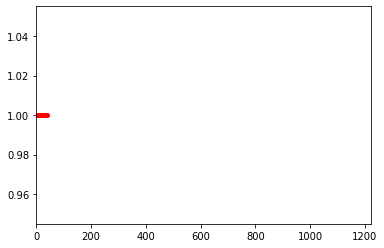

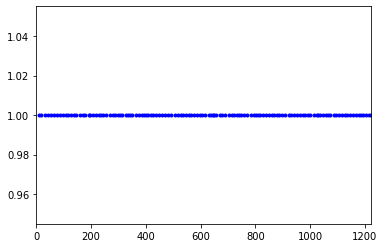

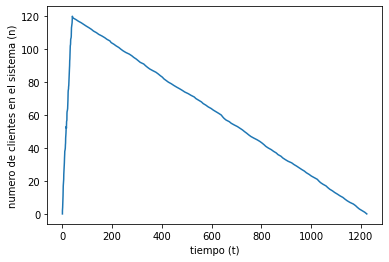

Tiempo medio de los clientes en el sistema:  593.8940319607556
Tiempo medio de los clientes en la cola:  584.007853098967
Tiempo transcurrido desde T hasta que el último cliente abandona el sistema:  1184.047673493411
Número máximo de clientes en el sistema:  120
Total de clientes que pasaron por el sistema:  123


In [100]:
at = np.array(at)
an = np.array(an)

LLt = np.array(LLt)
St = np.array(St)

tmp = np.zeros((len(LLt)))+1

plt.plot(LLt, tmp, 'r.')
plt.xlim(0, max(at))
plt.show()

tmp = np.zeros((len(St)))+1

plt.plot(St, tmp, 'b.')
plt.xlim(0, max(at))
plt.show()

plt.plot(at,an)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el sistema (n)')
plt.show()

print("Tiempo medio de los clientes en el sistema: ",t_med_sistema)
print("Tiempo medio de los clientes en la cola: ",t_med_cola)
print("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: ",Tp)
print("Número máximo de clientes en el sistema: ",max(an))
print("Total de clientes que pasaron por el sistema: ",NLL)

## 5.  (1.0 punto)
Usando el ejemplo de SimPy de abajo de una conferencia que incluye buffet (refrigerio) con un tiempo máximo de simulación de 4 horas (i.e. 240 minutos) modifique el código para:

**a)** Implementar las medidas de desempeño de hambre promedio y conocimiento promedio.<br>
**b)** Comparar y analizar los siguientes escenarios a partir de las medidas de desempeño implementadas indicando cual escenario es mejor:

> 1. Duración de la charla 15 minutos, 4 charlas por sesión, 15 minutos de break, 2 puestos de buffet y 3 minutos por turno para comer en el buffet
> 2. Duración de la charla 20 minutos, 4 charlas por sesión, 10 minutos de break, 2 puestos de buffet y 3 minutos por turno para comer en el buffet
> 3. Duración de la charla 15 minutos, 4 charlas por sesión, 20 minutos de break, 1 puestos de buffet y 3 minutos por turno para comer en el buffet

**c)** Implemente una configuración que garantice que el conocimiento promedio adquirido por los asistentes sea mayor de 3 y el hambre promedio sea menor a 2.

In [58]:
!pip install simpy
import simpy

In [59]:
from random import randint
import simpy 

In [66]:
TALKS_PER_SESSION = 3
TALK_LENGTH = 30
BREAK_LENGTH = 15
DURATION_EAT = 3
BUFFET_SLOTS = 2

In [69]:
def attendee(env, name, buffet, knowledge=0, hunger=0):
  hambre=[]
  while True:
    # Visit talks
    for i in range(TALKS_PER_SESSION):
      knowledge = knowledge + randint(0, 3) / (1 + hunger)
      hunger = hunger + randint(1, 4)
      hambre.append(hunger)
      
      yield env.timeout(TALK_LENGTH)
    print('El asistente %s terminó las charlas con un conocimiento %.2f y hambre '
    '%.2f.' % (name, knowledge, hunger))
    
    # Go to buffet
    start = env.now
    with buffet.request() as req:
      yield req | env.timeout(BREAK_LENGTH - DURATION_EAT)
      time_left = BREAK_LENGTH - (env.now - start)
      
      if req.triggered:
        food = min(randint(3, 12), time_left) # Less time -> less food
        yield env.timeout(DURATION_EAT)
        hunger -= min(food, hunger)
        time_left -= DURATION_EAT
        print('El asistente %s terminó de comer con hambre %.2f' %
              (name, hunger))
      else:
        hunger += 1 # Penalty for only taking a look at all the food.
        print('El asistente %s no llegó al buffet :( , el hambre es ahora '
        'at %.2f.' % (name, hunger))
    yield env.timeout(time_left)

In [70]:
env = simpy.Environment()
buffet = simpy.Resource(env, capacity=BUFFET_SLOTS)
for i in range(5):
  env.process(attendee(env, i, buffet))
env.run(until=220)

El asistente 0 terminó las charlas con un conocimiento 3.04 y hambre 10.00.
El asistente 1 terminó las charlas con un conocimiento 4.50 y hambre 4.00.
El asistente 2 terminó las charlas con un conocimiento 0.12 y hambre 11.00.
El asistente 3 terminó las charlas con un conocimiento 0.90 y hambre 5.00.
El asistente 4 terminó las charlas con un conocimiento 3.83 y hambre 8.00.
El asistente 0 terminó de comer con hambre 2.00
El asistente 1 terminó de comer con hambre 0.00
El asistente 2 terminó de comer con hambre 7.00
El asistente 3 terminó de comer con hambre 0.00
El asistente 4 terminó de comer con hambre 2.00
El asistente 0 terminó las charlas con un conocimiento 4.10 y hambre 9.00.
El asistente 1 terminó las charlas con un conocimiento 8.42 y hambre 8.00.
El asistente 2 terminó las charlas con un conocimiento 0.25 y hambre 15.00.
El asistente 3 terminó las charlas con un conocimiento 3.90 y hambre 6.00.
El asistente 4 terminó las charlas con un conocimiento 4.76 y hambre 7.00.
El asis